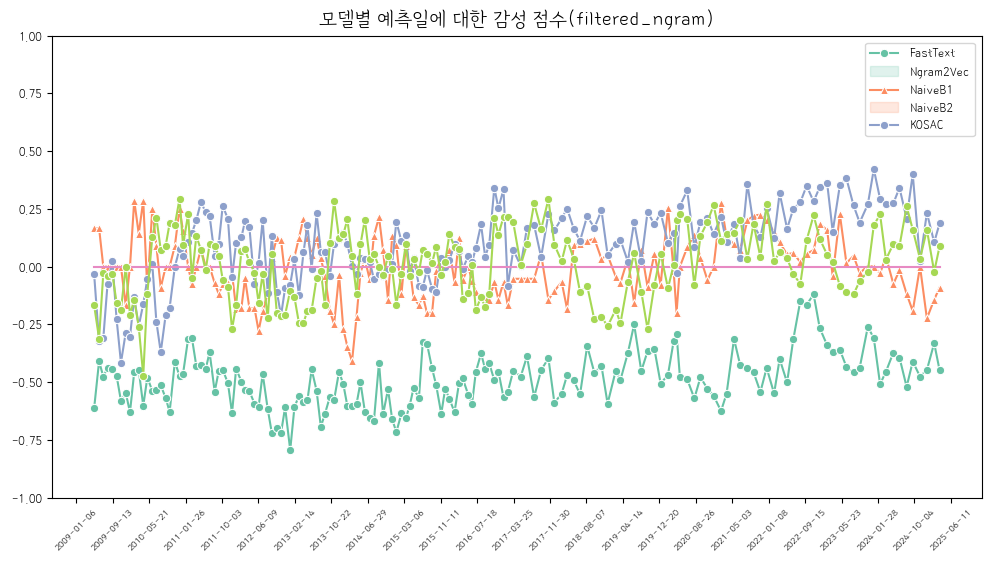

In [31]:
# 감성 점수를 바탕으로 graph 그려보기

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager as fm
import matplotlib.ticker as ticker
from dateutil.relativedelta import relativedelta

# 한글 폰트 설정
font_path = '/content/drive/MyDrive/Colab Notebooks/강원교육모두 Light.ttf'
fm.fontManager.addfont(font_path)
# 폰트를 사용할 수 있게 설정
plt.rcParams['font.family'] = 'GangwonEduAll'

# 데이터 로드
scores = pd.read_csv('/content/drive/MyDrive/BOK-TEAM-2/Evaluation/ngram문서단위감성점수계산.csv')
filter_scores = pd.read_csv('/content/drive/MyDrive/BOK-TEAM-2/Evaluation/filter_ngram문서단위감성점수계산.csv')

# 날짜 데이터 변환 (문자열이면 datetime으로 변환)
filter_scores['date'] = pd.to_datetime(filter_scores['date'])
next_date = [date + relativedelta(months=1) for date in filter_scores['date']]
# 그래프 색상 수정
sns.set_palette("Set2")

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.lineplot(x=next_date, y=filter_scores['tone_i_ft'], marker = 'o')
sns.lineplot(x=next_date, y=filter_scores['tone_i_n2v'], marker = '^')
sns.lineplot(x=next_date, y=filter_scores['tone_i_nb1'], marker = 'o')
sns.lineplot(x=next_date, y=filter_scores['tone_i_nb2'])
sns.lineplot(x=next_date, y=filter_scores['tone_i_kosac'], marker = 'o')

# x축 간격 조정
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(30))  # 레이블 수를 조정하여 간격을 넓힘

# x축 레이블 크기 및 회전 조정
plt.xticks(fontsize=8, rotation=45)

# 레이블 제거
plt.xlabel('')
plt.ylabel('')

# 범례
plt.legend(['FastText', 'Ngram2Vec', 'NaiveB1', 'NaiveB2','KOSAC'])
plt.title('모델별 예측일에 대한 감성 점수(filtered_ngram)', fontsize=16)

# y축 범위 설정
plt.ylim(-1, 1)
plt.savefig('/content/drive/MyDrive/BOK-TEAM-2/Evaluation/모델별 예측일에 대한 감성 점수(filtered_ngram).png')
# 그래프 출력
plt.show()

In [51]:
# 실제 콜금리 데이터와 비교하기
# 콜금리의 변화 정도 (%p)
from datetime import datetime
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
# 데이터 로드
scores = pd.read_csv('/content/drive/MyDrive/BOK-TEAM-2/Evaluation/ngram문서단위감성점수계산.csv')
filter_scores = pd.read_csv('/content/drive/MyDrive/BOK-TEAM-2/Evaluation/filter_ngram문서단위감성점수계산.csv')
call_rate = pd.read_csv('call_rate.csv')
call_rate['시점'] = pd.to_datetime(call_rate['시점'], format = '%Y%m%d').dt.date
scores['date'] = pd.to_datetime(scores['date']).dt.date
# 날짜 정렬 (이진 탐색을 위해 정렬 필요)
call_rate = call_rate.sort_values('시점').reset_index(drop=True)

# 금리 변화 정도 측정
points = []
call_rate_dates = call_rate['시점'].values  # numpy 배열로 변환 (검색 최적화)

for date in scores['date']:
    next_month_date = date + relativedelta(months=1)

    # 현재 날짜의 콜금리 찾기 (이전 날짜 중 가장 가까운 날짜)
    idx_start = call_rate_dates.searchsorted(date, side='right') - 1  # date 이하에서 가장 가까운 날짜
    if idx_start >= 0:  # 유효한 인덱스인지 확인
        start_date = call_rate_dates[idx_start]
        start = call_rate.loc[call_rate['시점'] == start_date, '값'].iloc[0]
    else:
        start = None  # 해당 날짜 이전 값이 없는 경우

    # 한 달 뒤 날짜의 콜금리 찾기 (이전 날짜 중 가장 가까운 날짜)
    idx_end = call_rate_dates.searchsorted(next_month_date, side='right') - 1  # next_month_date 이하에서 가장 가까운 날짜
    if idx_end >= 0:  # 유효한 인덱스인지 확인
        end_date = call_rate_dates[idx_end]
        end = call_rate.loc[call_rate['시점'] == end_date, '값'].iloc[0]
    else:
        end = None  # 해당 날짜 이전 값이 없는 경우

    # print(start, end)
    point = end - start
    points.append(point)

# label을 다른 df
scores['answer'] = points
filter_scores['answer'] = points

In [50]:
scores

,Unnamed: 0,date,tone_i_n2v,tone_i_ft,tone_i_nb1,tone_i_nb2,tone_i_kosac
0,0,2009-04-09,0.000000,-0.617130,0.023810,0.0,0.002329
1,1,2009-05-12,0.000000,-0.416340,-0.255556,0.0,0.015355
2,2,2009-06-11,0.000000,-0.481349,-0.266667,0.0,-0.059361
3,3,2009-07-09,0.000000,-0.447166,-0.015306,0.0,-0.082030
4,4,2009-08-11,0.000000,-0.444444,0.083333,0.0,-0.081163
...,...,...,...,...,...,...,...
155,155,2024-08-22,-0.230769,-0.369970,0.395896,0.0,0.098130
156,156,2024-10-11,-0.181818,-0.440003,0.054706,0.0,0.118610
157,157,2024-11-28,-0.153846,-0.444132,0.238645,0.0,0.105455
158,158,2025-01-16,-0.142857,-0.300861,0.139683,0.0,0.087911


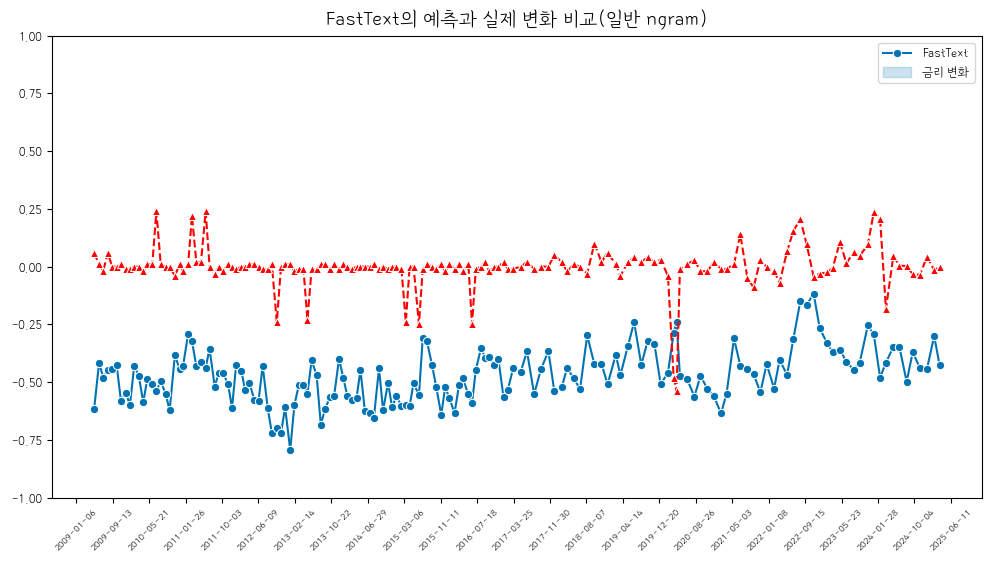

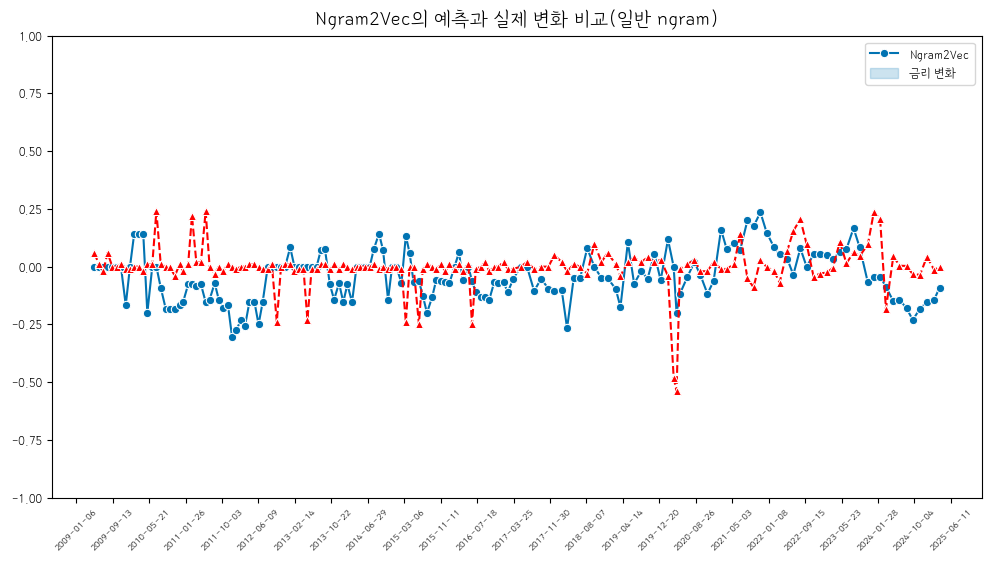

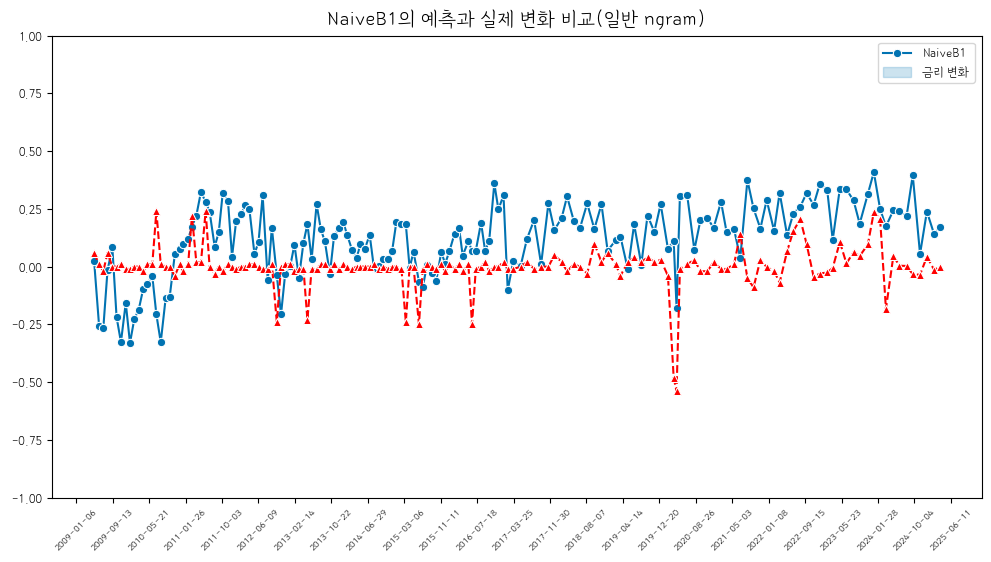

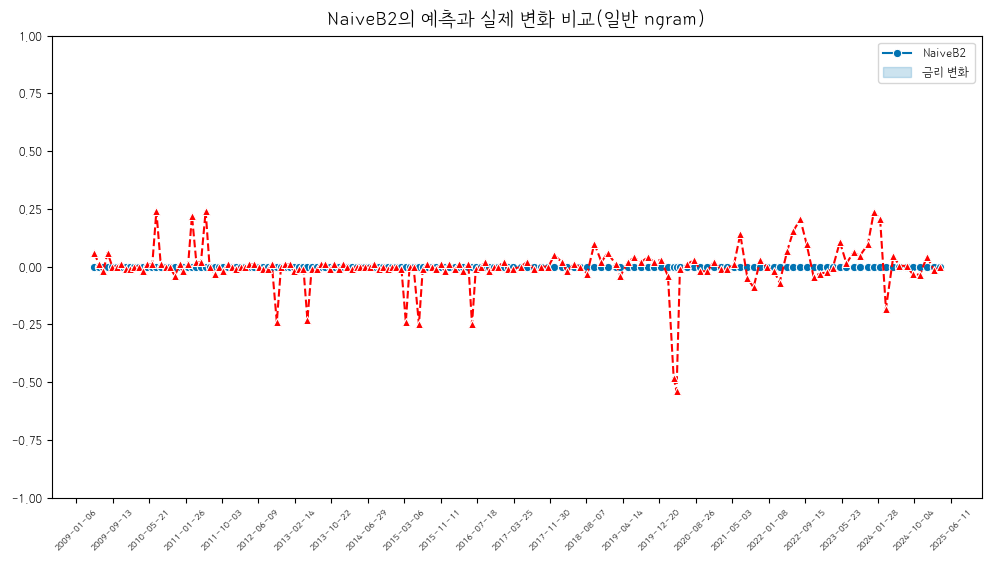

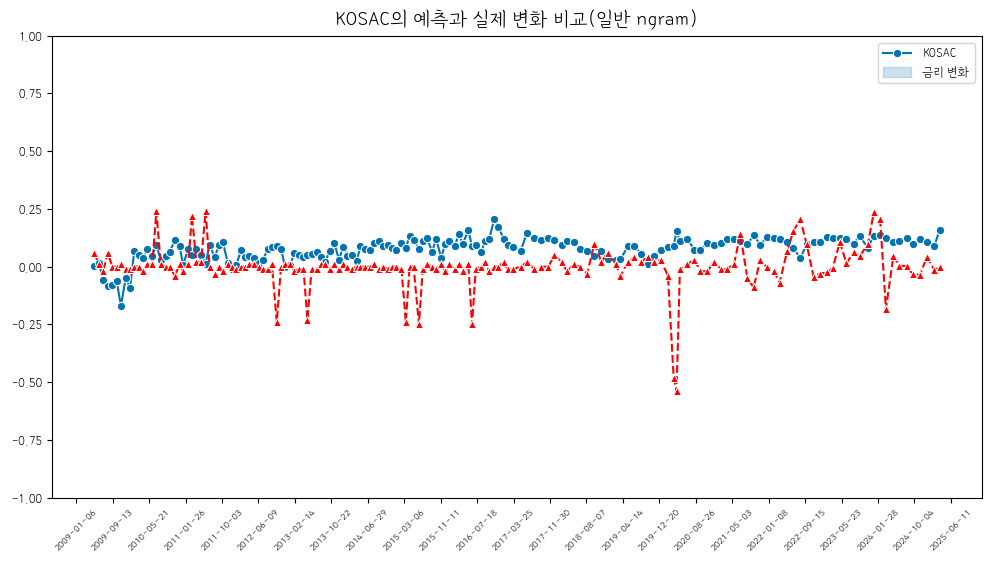

In [65]:
# 감성 점수를 바탕으로 graph 그려보기 일반 ngram
# 표 5개
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager as fm
import matplotlib.ticker as ticker
from dateutil.relativedelta import relativedelta

# 한글 폰트 설정
font_path = '/content/drive/MyDrive/Colab Notebooks/강원교육모두 Light.ttf'
fm.fontManager.addfont(font_path)
# 폰트를 사용할 수 있게 설정
plt.rcParams['font.family'] = 'GangwonEduAll'

# 데이터 로드
scores = pd.read_csv('/content/drive/MyDrive/BOK-TEAM-2/Evaluation/ngram문서단위감성점수계산.csv')

# 날짜 데이터 변환 (문자열이면 datetime으로 변환)
scores['date'] = pd.to_datetime(scores['date'])
next_date = [date + relativedelta(months=1) for date in filter_scores['date']]

scores['answer'] = points

# 그래프 색상 수정
sns.set_palette("colorblind")
cols = ['tone_i_ft', 'tone_i_n2v', 'tone_i_nb1', 'tone_i_nb2', 'tone_i_kosac']
models = ['FastText','Ngram2Vec', 'NaiveB1', 'NaiveB2','KOSAC']

for idx, col in enumerate(cols):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=next_date, y=scores[col], marker = 'o')
    sns.lineplot(x = next_date, y = scores['answer'] , marker = '^', color = 'r', linestyle = '--')

    # x축 간격 조정
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(30))  # 레이블 수를 조정하여 간격을 넓힘

    # x축 레이블 크기 및 회전 조정
    plt.xticks(fontsize=8, rotation=45)

    # 레이블 제거
    plt.xlabel('')
    plt.ylabel('')

    # 범례
    plt.legend([f'{models[idx]}', '금리 변화']) #'Ngram2Vec', 'NaiveB1', 'NaiveB2','KOSAC'])
    plt.title(f'{models[idx]}의 예측과 실제 변화 비교(일반 ngram)', fontsize=16)

    # y축 범위 설정
    plt.ylim(-1, 1)

    # 저장
    plt.savefig(f'/content/drive/MyDrive/BOK-TEAM-2/Evaluation/{models[idx]}의 예측과 실제 변화 비교(일반).png')
    # 그래프 출력
    plt.show()

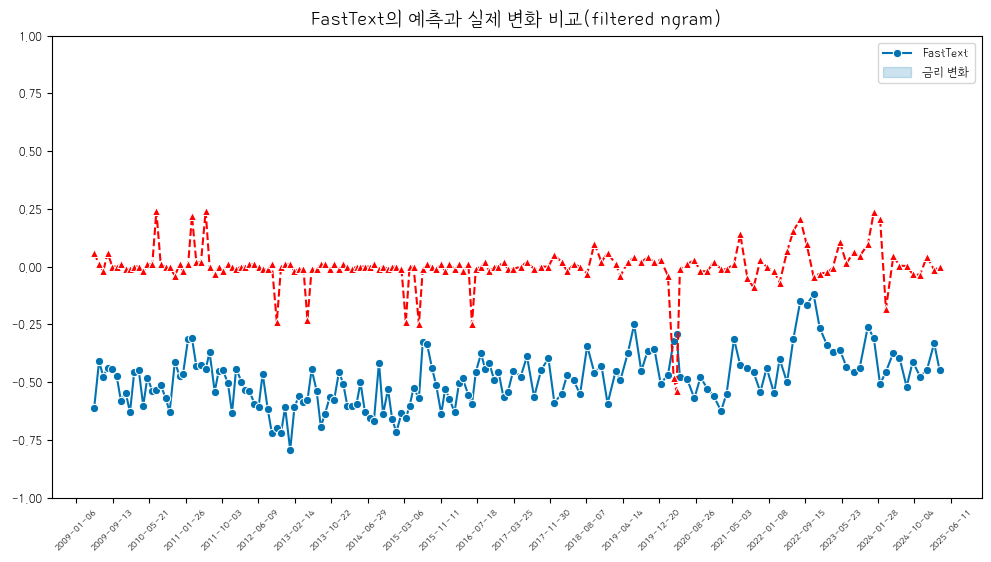

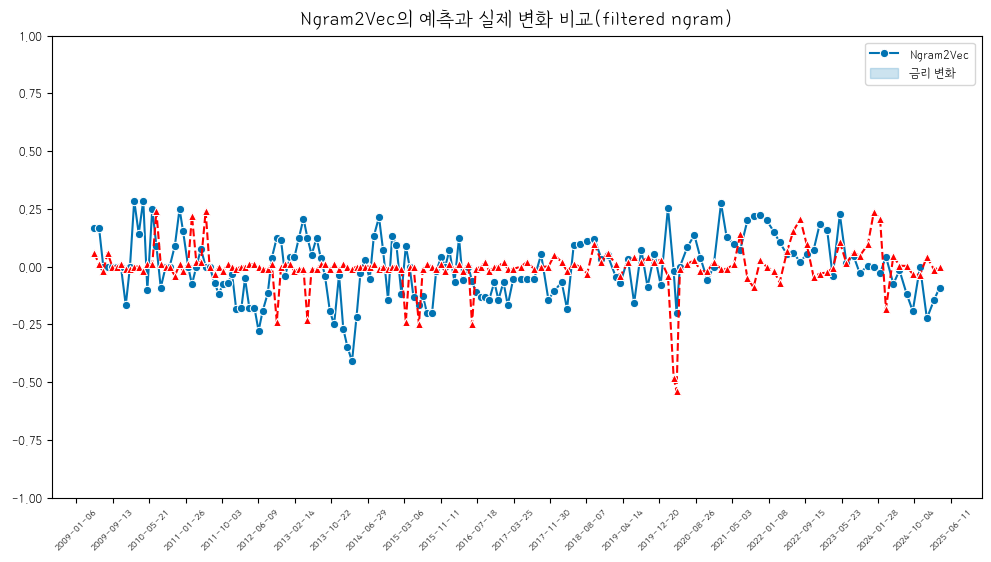

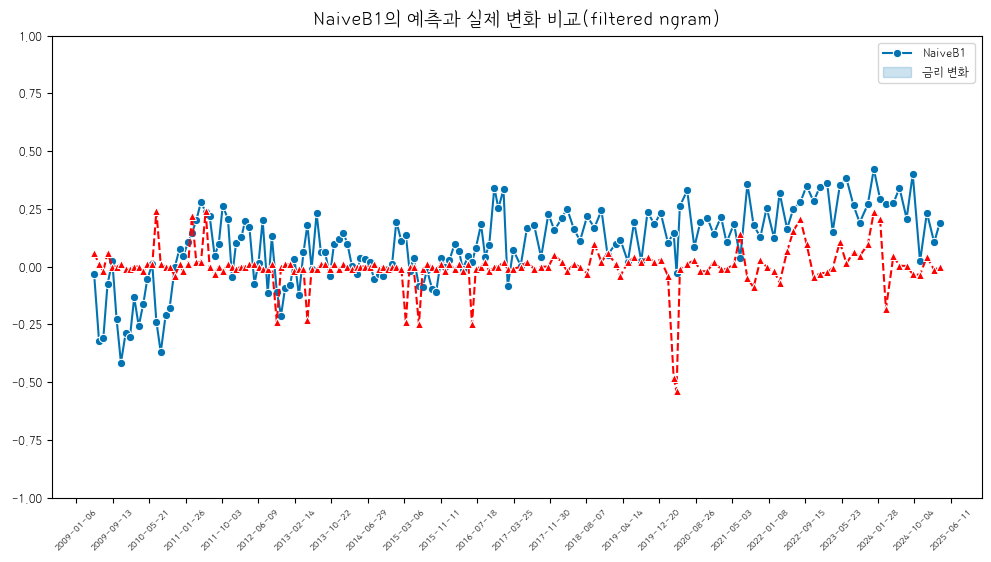

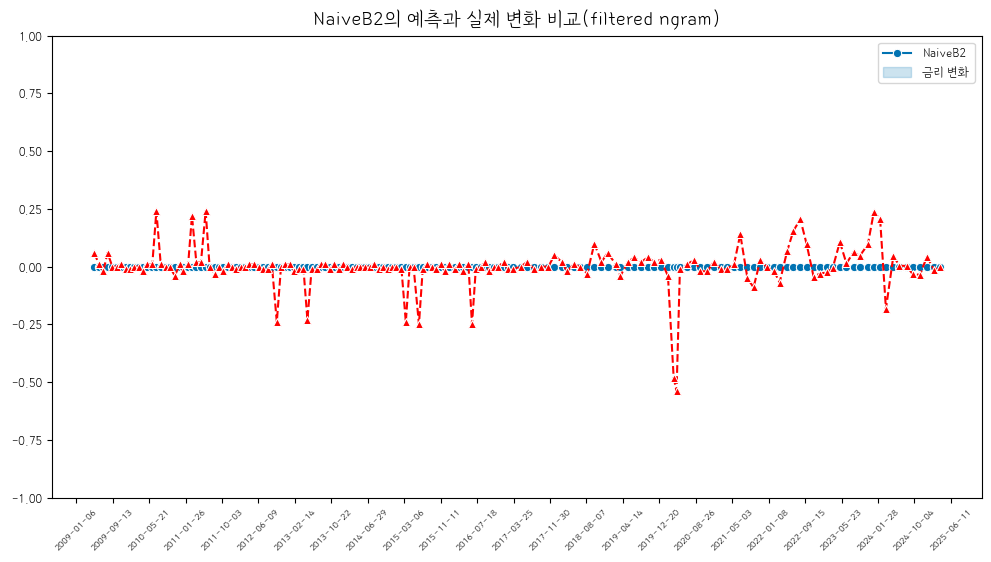

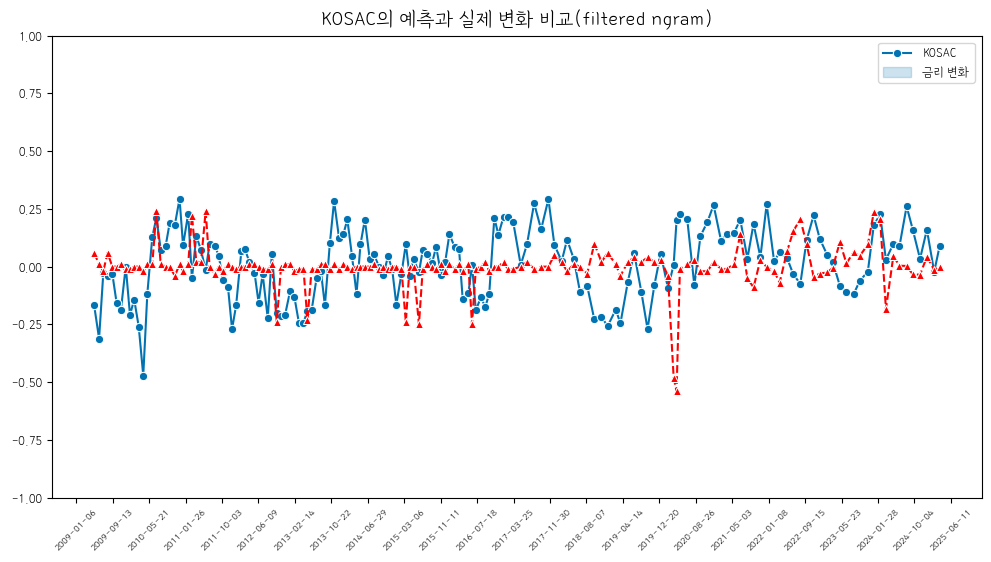

In [66]:
# 감성 점수를 바탕으로 graph 그려보기 filter ngram
# 표 5개
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import font_manager as fm
import matplotlib.ticker as ticker
from dateutil.relativedelta import relativedelta

# 한글 폰트 설정
font_path = '/content/drive/MyDrive/Colab Notebooks/강원교육모두 Light.ttf'
fm.fontManager.addfont(font_path)
# 폰트를 사용할 수 있게 설정
plt.rcParams['font.family'] = 'GangwonEduAll'

# 데이터 로드
filter_scores = pd.read_csv('/content/drive/MyDrive/BOK-TEAM-2/Evaluation/filter_ngram문서단위감성점수계산.csv')

# 날짜 데이터 변환 (문자열이면 datetime으로 변환)
filter_scores['date'] = pd.to_datetime(filter_scores['date'])
next_date = [date + relativedelta(months=1) for date in filter_scores['date']]

filter_scores['answer'] = points

# 그래프 색상 수정
sns.set_palette("colorblind")
cols = ['tone_i_ft', 'tone_i_n2v', 'tone_i_nb1', 'tone_i_nb2', 'tone_i_kosac']
models = ['FastText','Ngram2Vec', 'NaiveB1', 'NaiveB2','KOSAC']

for idx, col in enumerate(cols):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=next_date, y=filter_scores[col], marker = 'o')
    sns.lineplot(x = next_date, y = filter_scores['answer'] , marker = '^', color = 'r', linestyle = '--')

    # x축 간격 조정
    ax = plt.gca()
    ax.xaxis.set_major_locator(ticker.MaxNLocator(30))  # 레이블 수를 조정하여 간격을 넓힘

    # x축 레이블 크기 및 회전 조정
    plt.xticks(fontsize=8, rotation=45)

    # 레이블 제거
    plt.xlabel('')
    plt.ylabel('')

    # 범례
    plt.legend([f'{models[idx]}', '금리 변화']) #'Ngram2Vec', 'NaiveB1', 'NaiveB2','KOSAC'])
    plt.title(f'{models[idx]}의 예측과 실제 변화 비교(filtered ngram)', fontsize=16)

    # y축 범위 설정
    plt.ylim(-1, 1)

    # 저장
    plt.savefig(f'/content/drive/MyDrive/BOK-TEAM-2/Evaluation/{models[idx]}의 예측과 실제 변화 비교(filtered ngram).png')
    # 그래프 출력
    plt.show()